In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score,mean_absolute_error,mean_squared_error,classification_report
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [63]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [64]:
gender_encoder = LabelEncoder()
damage_encoder = LabelEncoder()
age_encoder = LabelEncoder()

train_data['Gender'] = gender_encoder.fit_transform(train_data['Gender'])
train_data['Vehicle_Age'] = age_encoder.fit_transform(train_data['Vehicle_Age'])
train_data['Vehicle_Damage'] = damage_encoder.fit_transform(train_data['Vehicle_Damage'])

test_data['Gender'] = gender_encoder.fit_transform(test_data['Gender'])
test_data['Vehicle_Age'] = age_encoder.fit_transform(test_data['Vehicle_Age'])
test_data['Vehicle_Damage'] = damage_encoder.fit_transform(test_data['Vehicle_Damage'])

In [65]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [66]:
features = ['Gender', 'Age', 'Driving_License', 
            'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
            'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
target = 'Response'

X = train_data[features]
y = train_data[target]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [68]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'Vehicle_Age <= 0.5\ngini = 0.215\nsamples = 285831\nvalue = [250795, 35036]'),
 Text(0.25, 0.7, 'Region_Code <= 0.5\ngini = 0.01\nsamples = 141479\nvalue = [140740, 739]'),
 Text(0.125, 0.5, 'Annual_Premium <= 152.5\ngini = 0.074\nsamples = 17947\nvalue = [17253, 694]'),
 Text(0.0625, 0.3, 'Gender <= 59.5\ngini = 0.061\nsamples = 15150\nvalue = [14674, 476]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Annual_Premium <= 158.5\ngini = 0.144\nsamples = 2797\nvalue = [2579, 218]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Annual_Premium <= 2.0\ngini = 0.001\nsamples = 123532\nvalue = [123487, 45]'),
 Text(0.3125, 0.3, 'Driving_License <= 20.5\ngini = 0.015\nsamples = 135\nvalue = [134, 1]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Annual_Premium <= 153.5\ngini = 0.001\nsamples = 123397\nvalue = [123353, 44]'),
 

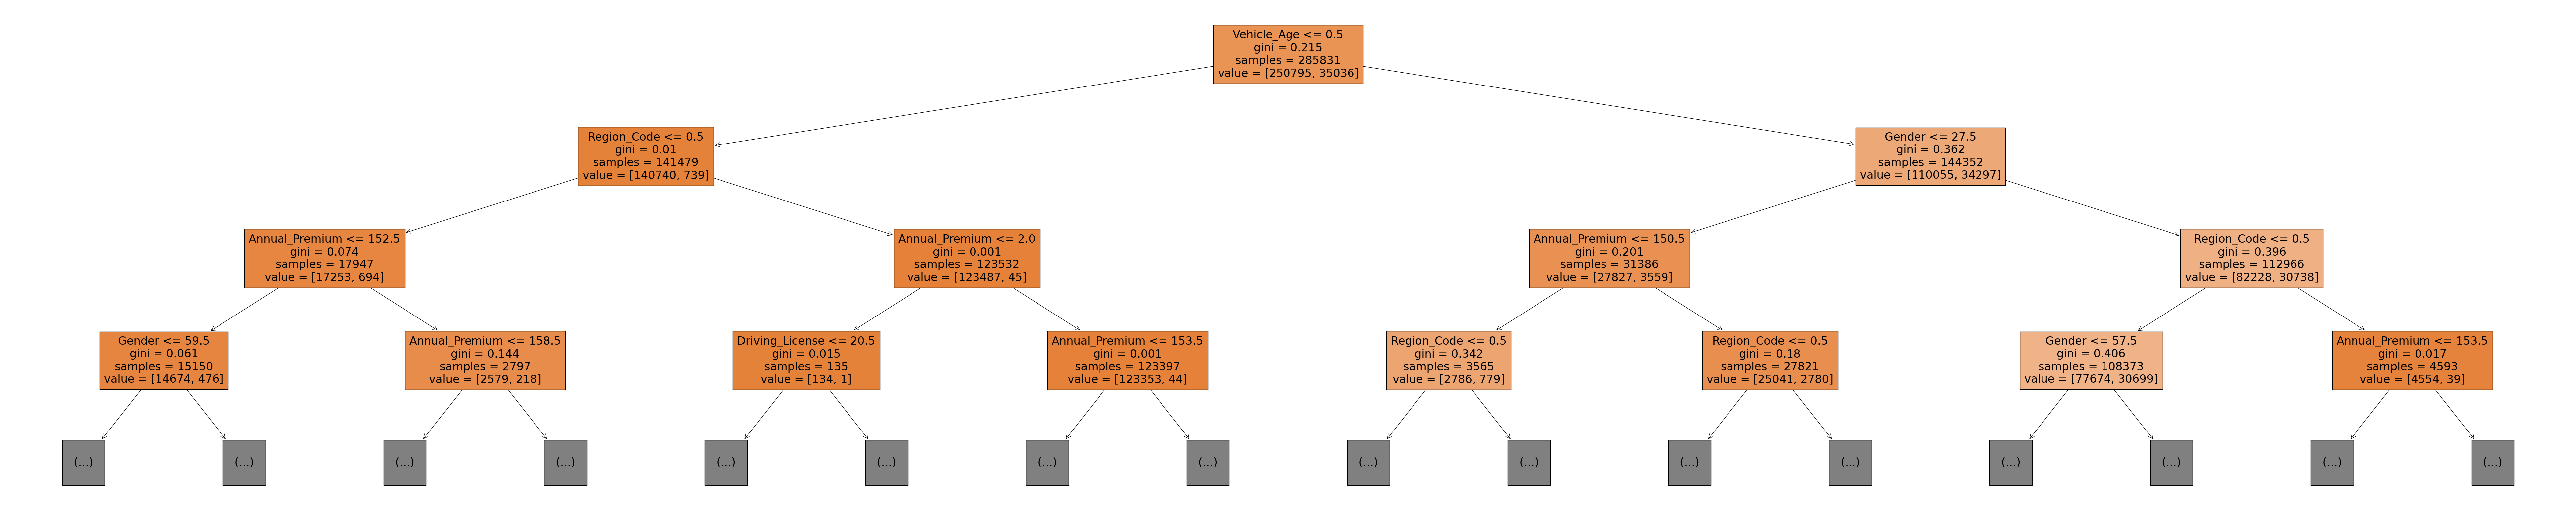

In [69]:
plt.figure(figsize=(100,20))
plot_tree(model, feature_names=train_data.columns, max_depth=3, filled=True)

In [70]:
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8245135288314196


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     83604
           1       0.30      0.32      0.31     11674

    accuracy                           0.82     95278
   macro avg       0.60      0.61      0.60     95278
weighted avg       0.83      0.82      0.83     95278



In [72]:
y_pred_proba = model.predict_proba(X_test)[:,1]
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('ROC_AUC_Score:', roc_auc_score(y_test, y_pred_proba))

Mean Absolute Error: 0.17548647116858038
Mean Squared Error: 0.17548647116858038
Root Mean Squared Error: 0.418911054006194
ROC_AUC_Score: 0.605741838157429


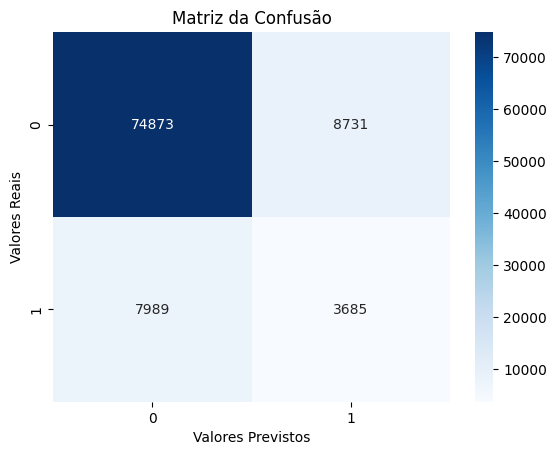

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz da Confusão')
plt.show()

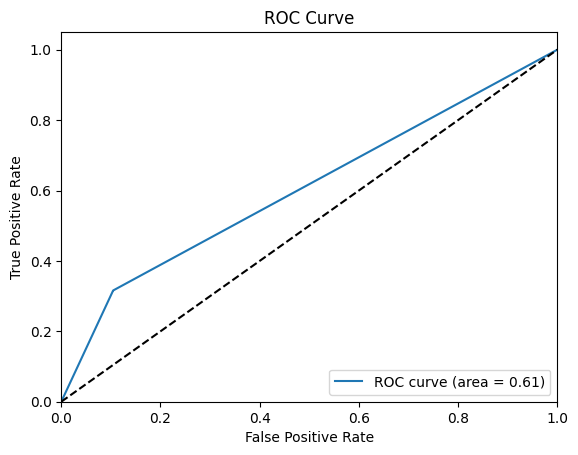

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [75]:
predictions = model.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [76]:
new_case = {
    'Gender': 'Male',
    'Age': 44,
    'Driving_License': 1,
    'Region_Code': 28.0,
    'Previously_Insured': 0,
    'Vehicle_Age': '> 2 Years',
    'Vehicle_Damage': 'Yes',
    'Annual_Premium': 40454.0,
    'Policy_Sales_Channel': 26.0,
    'Vintage': 217
}
new_case_df = pd.DataFrame([new_case])

new_case_df['Gender'] = gender_encoder.transform(new_case_df['Gender'])
new_case_df['Vehicle_Age'] = age_encoder.transform(new_case_df['Vehicle_Age'])
new_case_df['Vehicle_Damage'] = damage_encoder.transform(new_case_df['Vehicle_Damage'])

In [77]:
prediction = model.predict(new_case_df)
print("Previsão para o novo caso:",prediction)

Previsão para o novo caso: [1]
